In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import lfw_dataset as lfw
from lfw_dataset import LFWDataLoader
same_train_paths, diff_train_paths, same_val_paths, diff_val_paths, same_test_paths, diff_test_paths = lfw.load_data()


Data already exist


	First row - same person. second row - different persons



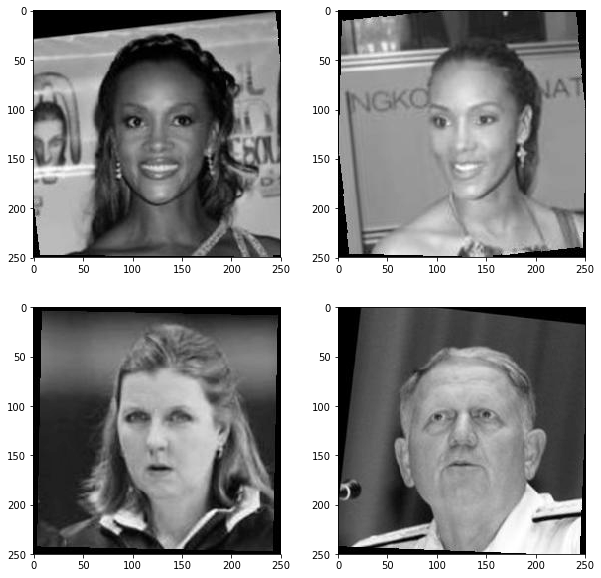

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread

# lets check that same images are really same person and vise versa
random_index = np.random.randint(0, len(same_train_paths))

f, ax = plt.subplots(2,2, figsize=(10,10))
ax[0][0].imshow(imread(same_train_paths[random_index][0]),cmap='gray')
ax[0][1].imshow(imread(same_train_paths[random_index][1]),cmap='gray')
ax[1][0].imshow(imread(diff_train_paths[random_index][0]),cmap='gray')
ax[1][1].imshow(imread(diff_train_paths[random_index][1]),cmap='gray')
print('\tFirst row - same person. second row - different persons\n')

In [10]:
from siamese import Siamese
learning_rate = 10e-2
s_net = Siamese(lr=learning_rate)
s_net.build('vggface')

In [ ]:
s_net.model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
vggface_resnet50 (Model)        (None, 8631)         41246071    input_5[0][0]                    
                                                                 input_6[0][0]                    
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 8631)         0           vggface_resnet50[1][0]           
          

In [ ]:
train_history = s_net.train(same_train_paths, diff_train_paths, same_val_paths, diff_val_paths, batch_size=32, epochs=500)

Epoch 1/500
55/55 [==============================] - 16s 296ms/step - loss: 0.6970 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 2/500
55/55 [==============================] - 11s 191ms/step - loss: 0.6931 - acc: 0.5023 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 3/500
55/55 [==============================] - 11s 193ms/step - loss: 0.6931 - acc: 0.5432 - val_loss: 0.6931 - val_acc: 0.5192
Epoch 4/500
55/55 [==============================] - 11s 193ms/step - loss: 0.6931 - acc: 0.5597 - val_loss: 0.6931 - val_acc: 0.5168
Epoch 5/500
55/55 [==============================] - 11s 191ms/step - loss: 0.6931 - acc: 0.5744 - val_loss: 0.6931 - val_acc: 0.5240
Epoch 6/500
55/55 [==============================] - 11s 191ms/step - loss: 0.6931 - acc: 0.5881 - val_loss: 0.6931 - val_acc: 0.5264
Epoch 7/500
55/55 [==============================] - 11s 194ms/step - loss: 0.6931 - acc: 0.5955 - val_loss: 0.6931 - val_acc: 0.5312
Epoch 8/500
55/55 [==============================] - 11s 192ms

In [ ]:
def evaluate(test_loss, test_accuracy, train_history):

    fig, axes = plt.subplots(1, 2)
    fig.set_figheight(7)
    fig.set_figwidth(14)

    print(history)
    # plot accuracy 
    axes[0].plot(train_history.history['acc'])
    axes[0].plot(train_history.history['val_acc'])
    axes[0].set_title('model accuracy')
    axes[0].set_ylabel('accuracy')
    axes[0].set_xlabel('epoch')
    axes[0].legend(['training', 'validation'], loc='best')

    # plot loss
    axes[1].plot(train_history.history['loss'])
    axes[1].plot(train_history.history['val_loss'])
    axes[1].set_title('model loss')
    axes[1].set_ylabel('accuracy')
    axes[1].set_xlabel('epoch')
    axes[1].legend(['training', 'validation'], loc='best')


    print()
    print(f'Test loss: {test_loss:.3}')
    print(f'Test accuracy: {test_accuracy:.3}')


In [ ]:
evaluate(test_loss, test_accuracy, train_history)